Using the Breast Cancer Wisconsin (Diagnostic) dataset (via Kaggle), this analysis uses supervised machine learning techniques, including logistic regression, decision tree, naive Bayes, and SVM classifier to predict whether cancer is benign or malignant.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
%matplotlib inline

## Data import and evaluation

In [2]:
# Import dataset and create dataframe
data = pd.read_csv('bdata.csv')
# view column headers
print(data.columns)

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'diagnosis'],
      dtype='object')


In [3]:
# See number of rows + columns in data file
print("Dimension of data: {}".format(data.shape))

Dimension of data: (569, 23)


In [4]:
# Overview of column content
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 23 columns):
id                        569 non-null int64
radius_mean               569 non-null float64
texture_mean              569 non-null float64
perimeter_mean            569 non-null float64
area_mean                 569 non-null float64
smoothness_mean           569 non-null float64
compactness_mean          569 non-null float64
concavity_mean            569 non-null float64
concave points_mean       569 non-null float64
symmetry_mean             569 non-null float64
fractal_dimension_mean    569 non-null float64
radius_se                 569 non-null float64
texture_se                569 non-null float64
perimeter_se              569 non-null float64
area_se                   569 non-null float64
smoothness_se             569 non-null float64
compactness_se            569 non-null float64
concavity_se              569 non-null float64
concave points_se         569 non-null float64
symm

In [5]:
# Note diagnosis column - 1=malignant, 0=benign

# overview of data
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,diagnosis
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,0.372583
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,0.483918
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,0.000000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,0.000000
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,0.000000
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,1.000000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,1.000000


In [6]:
# view first five rows of data
data.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,1


In [7]:
# check for balance of dataset
diag, counts = np.unique(data.diagnosis, return_counts=True)
dict(zip(diag, counts)) # 1=malignant, 0=benign

{0: 357, 1: 212}

diagnosis
0    [[AxesSubplot(0.125,0.758226;0.125x0.121774), ...
1    [[AxesSubplot(0.125,0.758226;0.125x0.121774), ...
dtype: object

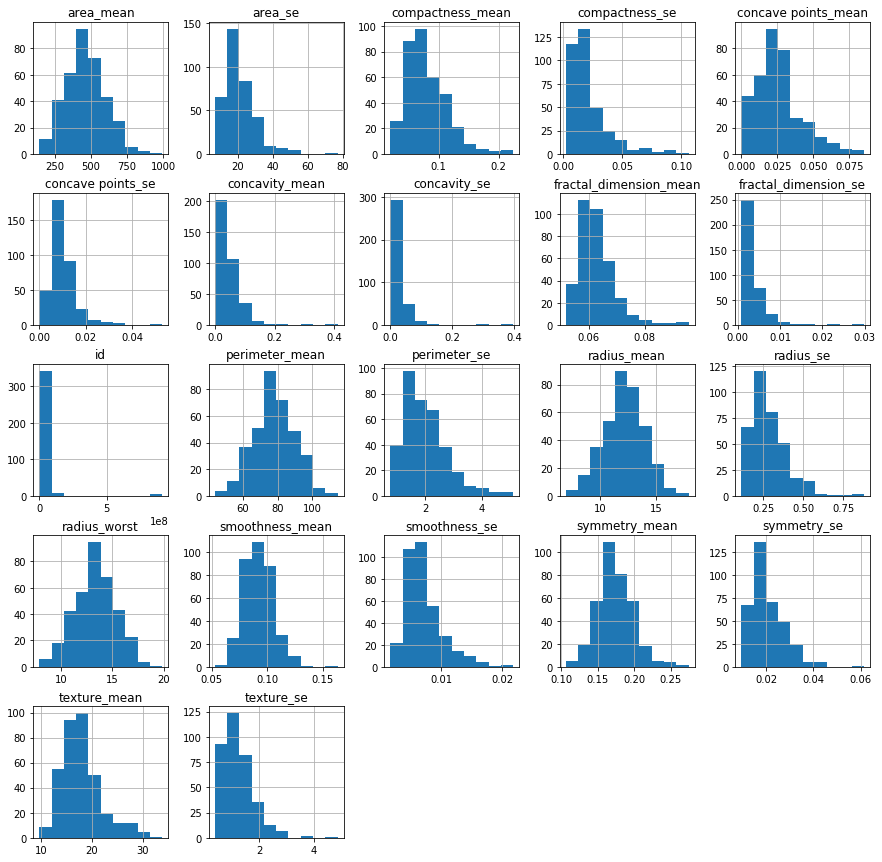

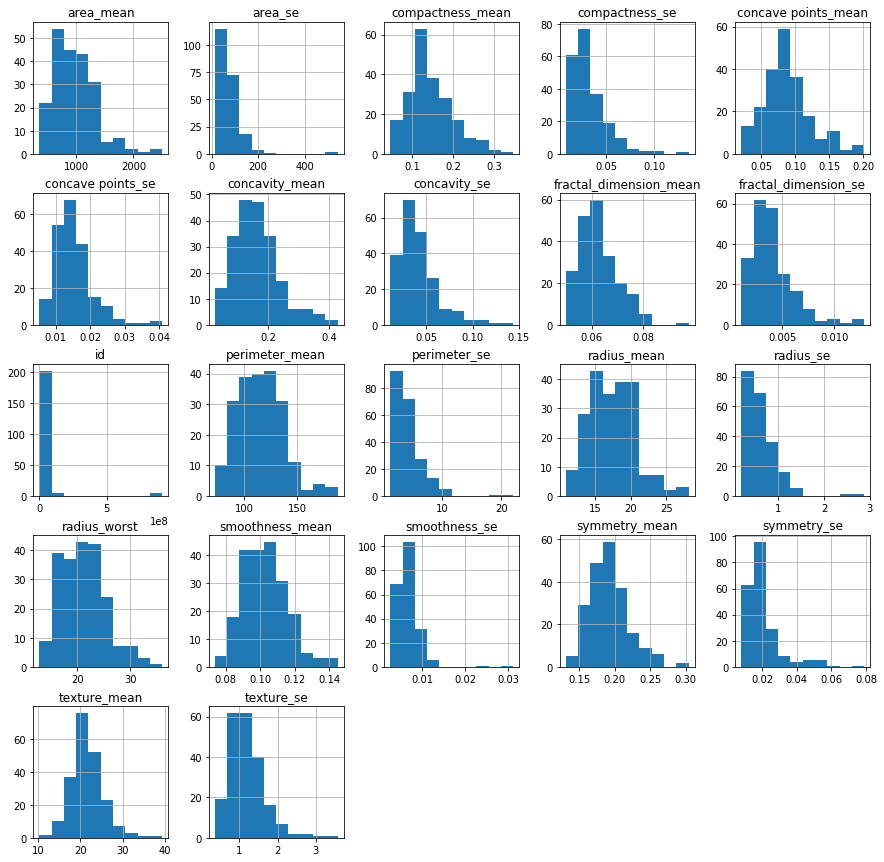

In [8]:
# Visualize dataset
data.groupby('diagnosis').hist(figsize=(15, 15))

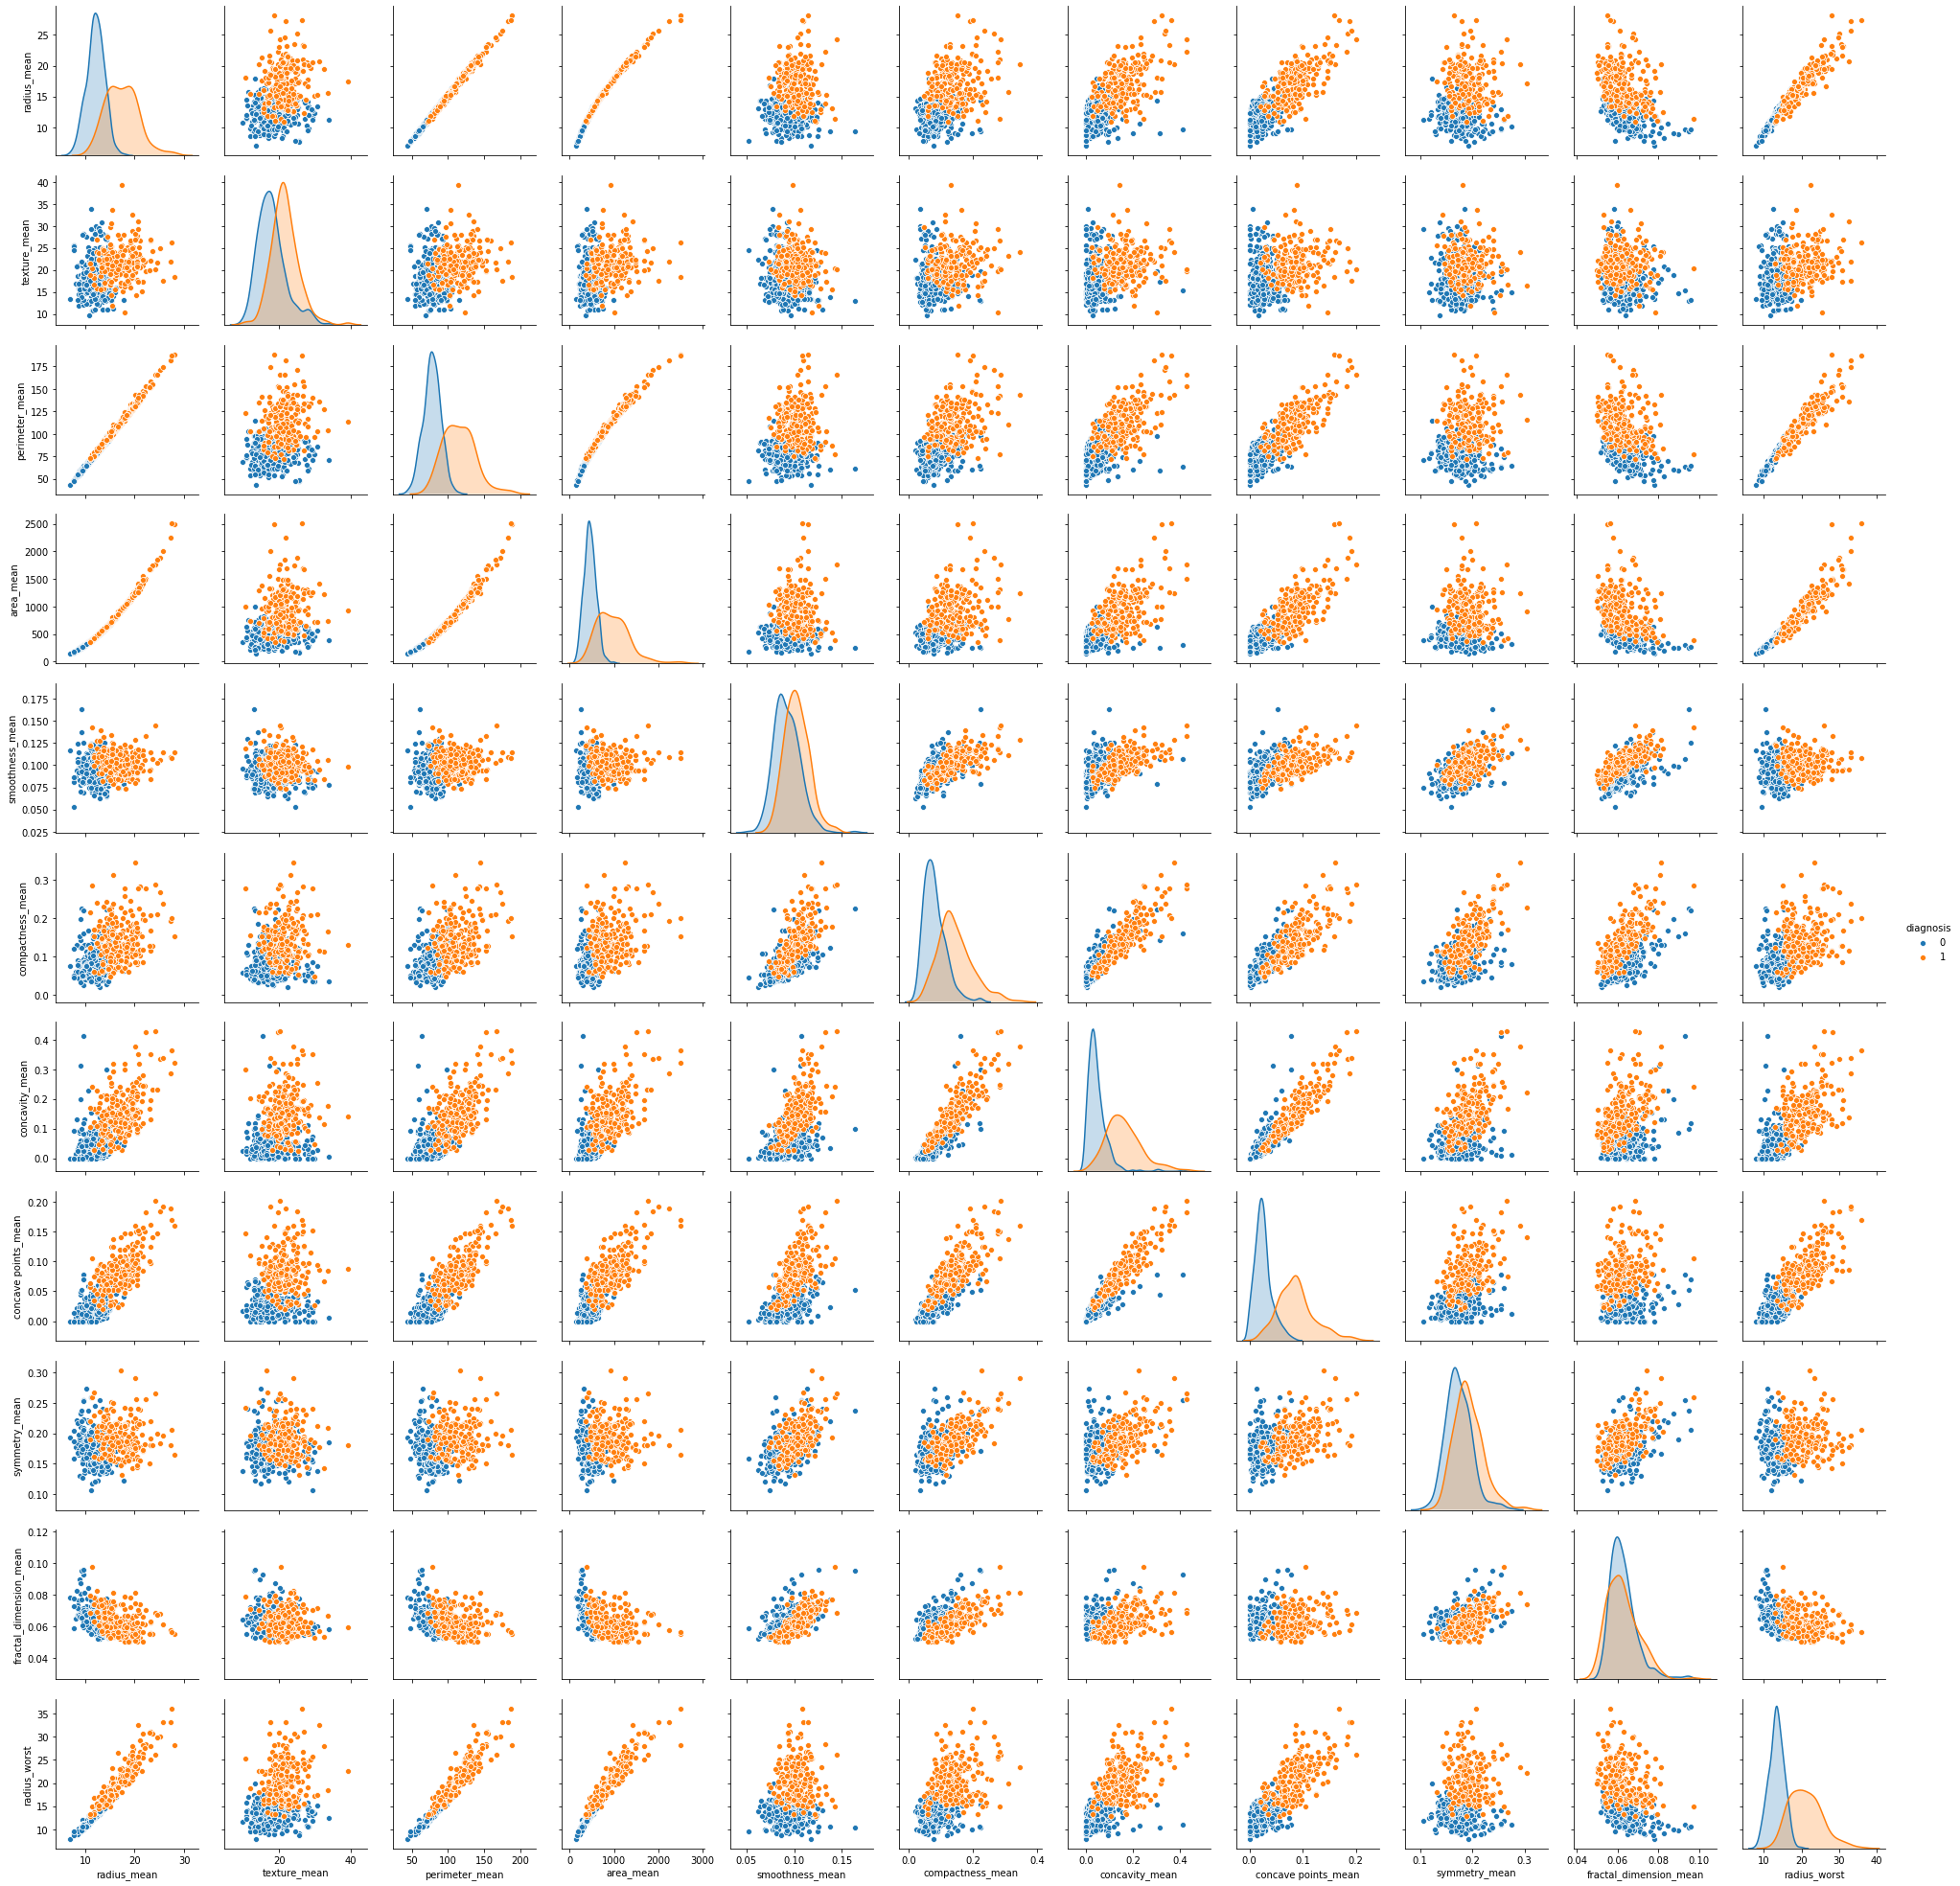

In [9]:
sns.pairplot(data, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_worst'])

In [10]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['id','diagnosis'])
y = data['diagnosis']
feature_names = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

In [11]:
# Rescale data so that all the features are approximately on the same scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Logistic regression

In [12]:
logreg = LogisticRegression(max_iter=1000, C=100).fit(X_train, y_train)
print("Logistic regression training set accuracy: {:.4f}".format(logreg.score(X_train, y_train)))
print("Logistic regression test set accuracy: {:.4f}".format(logreg.score(X_test, y_test)))

Logistic regression training set accuracy: 0.9695
Logistic regression test set accuracy: 0.9510


In [13]:
coef_dict = {}
for coef, feat in zip(logreg.coef_[0,:],feature_names):
    coef_dict[feat] = coef

# Print feature importances
for k, v in coef_dict.items():
    print (k, '---', v)

radius_mean --- -7.369953258277502
texture_mean --- 0.3626981246761701
perimeter_mean --- 0.4218238054250488
area_mean --- 0.028185809095165715
smoothness_mean --- 6.846718682506204
compactness_mean --- 0.7818204934163824
concavity_mean --- 10.23734378252724
concave points_mean --- 10.20554831254678
symmetry_mean --- 12.91598156973982
fractal_dimension_mean --- -0.3783817145290724
radius_se --- -6.102125952143134
texture_se --- -0.6410383713579082
perimeter_se --- 0.31012127497338143
area_se --- 0.10413848996362153
smoothness_se --- 0.5641457677385627
compactness_se --- -7.502910493488168
concavity_se --- -6.592462735694748
concave points_se --- 0.989237433931497
symmetry_se --- -0.12538644069594332
fractal_dimension_se --- -1.6939253196597976
radius_worst --- 2.667790336332628


In [14]:
# Confusion Matrix
y_pred = logreg.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[89  1]
 [ 6 47]]


In [15]:
# Precision/Recall/f-score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        90
           1       0.98      0.89      0.93        53

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



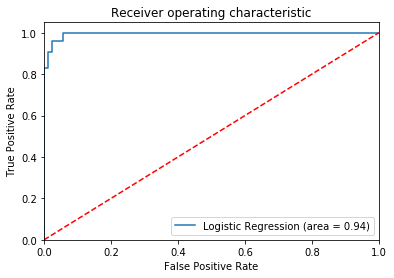

In [16]:
# AUC graph 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [17]:
# calculate AUC
print('AUC: %.3f' % metrics.auc(fpr, tpr))

AUC: 0.996


## Naive Bayes

In [18]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

print("Naive Bayes accuracy on training set: {:.4f}".format(gnb.score(X_train, y_train)))
print("Naive Bayes accuracy on test set: {:.4f}".format(gnb.score(X_test, y_test)))

Naive Bayes accuracy on training set: 0.9178
Naive Bayes accuracy on test set: 0.9301


In [19]:
#Confusion Matrix
y_pred = gnb.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[90  0]
 [10 43]]


In [20]:
# Precision/Recall
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        90
           1       1.00      0.81      0.90        53

    accuracy                           0.93       143
   macro avg       0.95      0.91      0.92       143
weighted avg       0.94      0.93      0.93       143



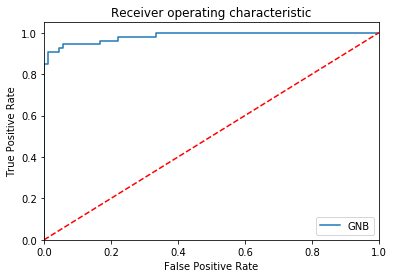

In [21]:
GNB_roc_auc = roc_auc_score(y_test, gnb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gnb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='GNB' % GNB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('GNB_ROC')
plt.show()

In [22]:
# calculate AUC
print('AUC: %.3f' % metrics.auc(fpr, tpr))

AUC: 0.984


## Decision Tree

In [23]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)
print("Decision tree accuracy on training set: {:.4f}".format(tree.score(X_train, y_train)))
print("Decision tree accuracy on test set: {:.4f}".format(tree.score(X_test, y_test)))

Decision tree accuracy on training set: 0.9742
Decision tree accuracy on test set: 0.9580


In [24]:
coef_dict = {}
for coef, feat in zip(tree.feature_importances_, feature_names):
    coef_dict[feat] = coef

# Print feature importances
for k, v in coef_dict.items():
    print (k, '---', v)

radius_mean --- 0.0
texture_mean --- 0.11372349507227267
perimeter_mean --- 0.0
area_mean --- 0.0
smoothness_mean --- 0.0
compactness_mean --- 0.0
concavity_mean --- 0.01979077099480163
concave points_mean --- 0.14483390965463225
symmetry_mean --- 0.0
fractal_dimension_mean --- 0.0
radius_se --- 0.0
texture_se --- 0.0
perimeter_se --- 0.0
area_se --- 0.03094666422290012
smoothness_se --- 0.0
compactness_se --- 0.0403020653360952
concavity_se --- 0.0
concave points_se --- 0.0
symmetry_se --- 0.0
fractal_dimension_se --- 0.0
radius_worst --- 0.6504030947192981


In [25]:
#Confusion Matrix
y_pred = tree.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[89  1]
 [ 5 48]]


In [26]:
# Precision/Recall
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        90
           1       0.98      0.91      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



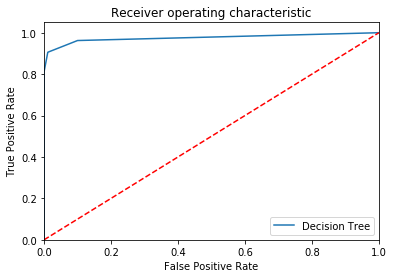

In [27]:
DT_roc_auc = roc_auc_score(y_test, tree.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, tree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree' % DT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

In [28]:
# calculate AUC
print('AUC: %.3f' % metrics.auc(fpr, tpr))

AUC: 0.976


## Random forest

In [32]:
rf1 = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf1.fit(X_train, y_train)
print("Random forest accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Random forest accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

Random forest accuracy on training set: 0.995
Random forest accuracy on test set: 0.944


In [33]:
coef_dict = {}
for coef, feat in zip(rf1.feature_importances_, feature_names):
    coef_dict[feat] = coef

# Print feature importances
for k, v in coef_dict.items():
    print (k, '---', v)

radius_mean --- 0.05223504115769762
texture_mean --- 0.05160877522062524
perimeter_mean --- 0.06870459816101372
area_mean --- 0.018679916766177522
smoothness_mean --- 0.02452387256881909
compactness_mean --- 0.0464019463969913
concavity_mean --- 0.07861339752424623
concave points_mean --- 0.33152648818510183
symmetry_mean --- 0.009628722370767213
fractal_dimension_mean --- 0.015203509345486447
radius_se --- 0.07271539213312665
texture_se --- 0.009479262637671496
perimeter_se --- 0.011593670614368248
area_se --- 0.07226562334531428
smoothness_se --- 0.018436077807188644
compactness_se --- 0.005612916891282428
concavity_se --- 0.015661380810999027
concave points_se --- 0.00844871739666268
symmetry_se --- 0.011880451272727695
fractal_dimension_se --- 0.007703144309806006
radius_worst --- 0.06907709508392681


In [34]:
#Confusion Matrix
y_pred = rf1.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[88  2]
 [ 6 47]]


In [35]:
# Precision/Recall
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        90
           1       0.96      0.89      0.92        53

    accuracy                           0.94       143
   macro avg       0.95      0.93      0.94       143
weighted avg       0.94      0.94      0.94       143



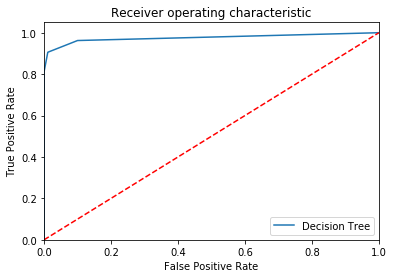

In [36]:
RF_roc_auc = roc_auc_score(y_test, tree.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, tree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree' % RF_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

In [37]:
# calculate AUC
print('AUC: %.3f' % metrics.auc(fpr, tpr))

AUC: 0.976


## Support Vector Machine

In [38]:
from sklearn.feature_selection import SelectFromModel

svc = SVC(probability=True, kernel='linear', random_state=0)
svc.fit(X_train_scaled, y_train)

print("SVM accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("SVM accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))
#print("SVM feature importances:\n{}".format(svc.feature_importances_))

SVM accuracy on training set: 0.98
SVM accuracy on test set: 0.98


In [39]:
coef_dict = {}
for coef, feat in zip(svc.coef_[0,:], feature_names):
    coef_dict[feat] = coef

# Print feature importances
for k, v in coef_dict.items():
    print (k, '---', v)

radius_mean --- -0.2725095907666705
texture_mean --- 1.1281590184151367
perimeter_mean --- -0.24581605827551678
area_mean --- 0.23380456161295887
smoothness_mean --- 0.363535192614658
compactness_mean --- -0.39430249089793945
concavity_mean --- 1.8561503059851494
concave points_mean --- 0.4731255403104543
symmetry_mean --- 0.41801379757385715
fractal_dimension_mean --- 0.25269779330417175
radius_se --- 0.05756945004509756
texture_se --- -0.4942676332244571
perimeter_se --- 0.34964212925492444
area_se --- 0.5549843398733787
smoothness_se --- 0.19937490269767555
compactness_se --- -0.5986685603172803
concavity_se --- -0.09221363144201702
concave points_se --- 0.07340226200834965
symmetry_se --- -0.2966916054165004
fractal_dimension_se --- -0.5763227478974194
radius_worst --- 2.5707909310657464


In [40]:
#Confusion Matrix
y_pred = svc.predict(X_test_scaled)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[90  0]
 [ 3 50]]


In [41]:
# Precision/Recall
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        90
           1       1.00      0.94      0.97        53

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



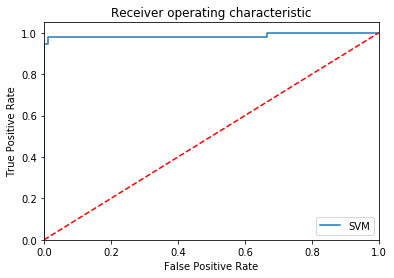

In [42]:
SVM_roc_auc = roc_auc_score(y_test, svc.predict(X_test_scaled))
fpr, tpr, thresholds = roc_curve(y_test, svc.predict_proba(X_test_scaled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM' % SVM_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

In [43]:
# calculate AUC
print('AUC: %.3f' % metrics.auc(fpr, tpr))

AUC: 0.987
